<a href='https://kritikseth.github.io/ipynbtagredirect' target='_parent'><img src='https://raw.githack.com/kritikseth/kritikseth/master/assets/icons/kritik_ipynbtagredirect.svg' alt='Kritik Seth'/></a>

If you are viewing this in GitHub and cannot see the plots, [Click Here](https://nbviewer.jupyter.org/github/kritikseth/ML-College-Sem-V/blob/master/ML_13_J043_191020.ipynb)

[Click Here](https://github.com/kritikseth/ML-College-Sem-V/blob/master/ML_13_J043_191020.ipynb) to go back to GitHub

In [ ]:
!pip install livelossplot
!wget -O AirQualityUCI.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip AirQualityUCI.zip

In [2]:
import pandas as pd
import numpy as np

import keras
from keras.models import load_model
from keras.datasets import cifar10
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Activation
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam

from livelossplot import PlotLossesKeras
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

X_train = X_train[:,:,:,0]
X_test = X_test[:,:,:,0]

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((50000, 32, 32), (10000, 32, 32), (50000, 1), (10000, 1))

In [7]:
X_val = X_test[:7000]
X_test = X_test[7000:]

In [8]:
input_img = Input(shape=(32, 32))

#Encoding
x = Dense(128, activation = 'relu')(input_img)
x = Dense(64, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(16, activation = 'relu')(x)
encoded = Dense(8, activation = 'relu')(x)

# Decoding
x = Dense(8, activation = 'relu')(encoded)
x = Dense(16, activation = 'relu')(x)
x = Dense(32, activation = 'relu')(x)
x = Dense(64, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
decoded = Dense(32, activation = 'sigmoid')(x)

In [9]:
model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')

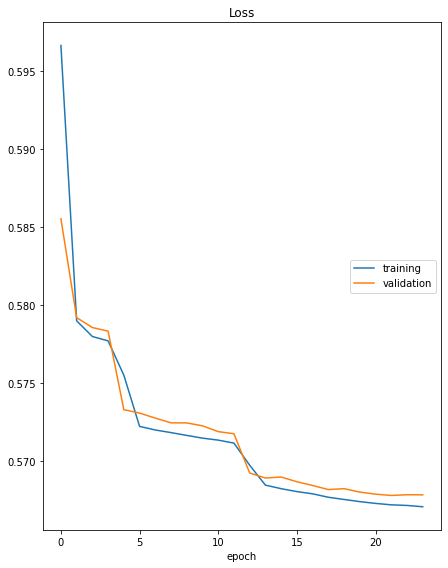

Loss
	training         	 (min:    0.567, max:    0.597, cur:    0.567)
	validation       	 (min:    0.568, max:    0.586, cur:    0.568)
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5671 - val_loss: 0.5679
Epoch 00024: early stopping


In [10]:
batch_size = 32
num_classes = 10
epochs = 100
es = EarlyStopping(monitor = 'val_loss', patience = 2, verbose = 1, mode = 'auto')
chkpt = 'AutoEncoder_Cifar10_Deep_weights.hdf5'
mc = ModelCheckpoint(filepath = chkpt, monitor = 'val_loss', verbose = 1, save_best_only = True, mode = 'auto')

history = model.fit(X_train, X_train, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (X_val, X_val), 
                    callbacks = [es, mc, PlotLossesKeras()], shuffle = True)

In [11]:
model.evaluate(X_test, X_test, verbose=1)

94/94 [==============================] - 0s 4ms/step - loss: 0.5676


0.5676141381263733

In [12]:
c10test = model.predict(X_test)
c10val = model.predict(X_val)
print(f'Validation Dataset Score: {np.average(c10val)}\nTest Dataset Score: {np.average(c10test)}')

Validation Dataset Score: 0.4954608976840973
Test Dataset Score: 0.490359365940094


In [13]:
def showOrigDec(orig, dec, num=10):
  n = num 
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(orig[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(dec[i].reshape(32,32))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

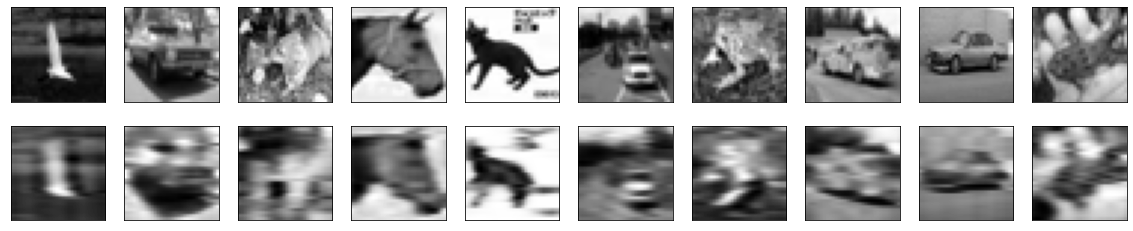

In [14]:
showOrigDec(X_test, c10test)

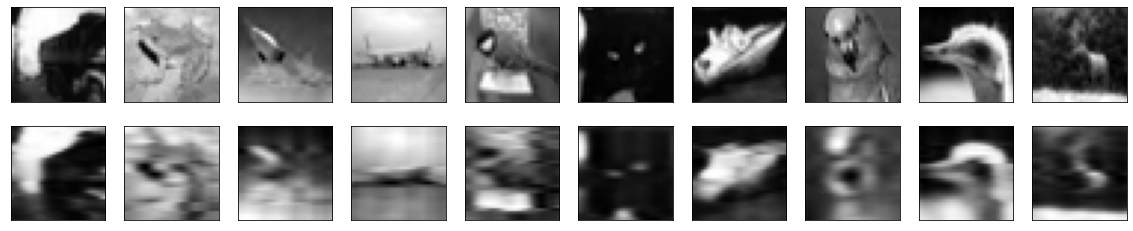

In [15]:
showOrigDec(X_test[100:], c10test[100:])

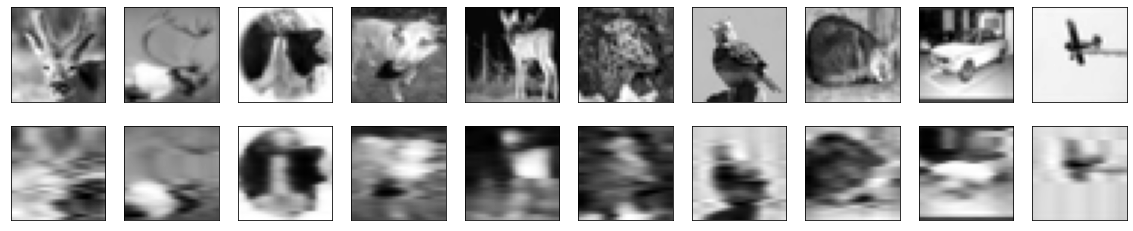

In [16]:
showOrigDec(X_test[200:], c10test[200:])

In [17]:
from sklearn.cluster import AgglomerativeClustering, SpectralClustering, Birch

In [18]:
data = pd.read_excel('/content/AirQualityUCI.xlsx')

In [19]:
data.shape

(9357, 15)

In [20]:
data.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [21]:
data.replace(to_replace = -200, value = np.NaN, inplace = True )
num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [22]:
data.drop(['NMHC(GT)'], axis = 1, inplace = True)
num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64

In [23]:
data['T'] = data.groupby('Date')['T'].transform(lambda x: x.fillna(x.mean()))
data['CO(GT)'] = data.groupby('Date')['CO(GT)'].transform(lambda x: x.fillna(x.mean()))
data['NOx(GT)'] = data.groupby('Date')['NOx(GT)'].transform(lambda x: x.fillna(x.mean()))
data['NO2(GT)'] = data.groupby('Date')['NO2(GT)'].transform(lambda x: x.fillna(x.mean()))

In [24]:
data.fillna(method='ffill', inplace= True)

num = data.isnull().sum()
percent = num/data.shape[0]*100
percent

Date             0.0
Time             0.0
CO(GT)           0.0
PT08.S1(CO)      0.0
C6H6(GT)         0.0
PT08.S2(NMHC)    0.0
NOx(GT)          0.0
PT08.S3(NOx)     0.0
NO2(GT)          0.0
PT08.S4(NO2)     0.0
PT08.S5(O3)      0.0
T                0.0
RH               0.0
AH               0.0
dtype: float64

In [25]:
x1 = data.drop(['Time'], axis=1, inplace=False)
x = x1.drop(['Date'], axis=1, inplace=False)
x.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.00,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2.0,1292.25,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2.2,1402.00,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2.2,1375.50,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,1.6,1272.25,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [26]:
birch = Birch()
pred_birch = birch.fit_predict(x)

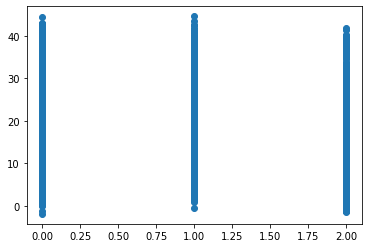

In [27]:
plt.scatter(pred_birch, x['T'], cmap = 'coolwarm')

In [28]:
agg = AgglomerativeClustering(affinity = 'euclidean', compute_full_tree = 'auto', connectivity = None, 
                              distance_threshold = None, linkage = 'ward', memory = None, n_clusters = 3)
pred_agg = agg.fit_predict(x)

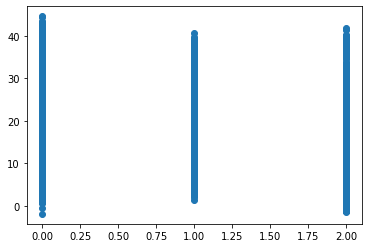

In [29]:
plt.scatter(pred_agg, x['T'], cmap = 'coolwarm')